## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
#!pip install pandas_datareader

import pandas_datareader as pdr
import matplotlib.pyplot as plt

start = '2017-01-01'
end = '2018-12-31'

apple_stock = pdr.data.get_data_yahoo('AAPL', start, end)

plt.figure(figsize=(12, 5))
plt.plot(apple_stock[''])
plt.title('(2017-2018)')
plt.xlabel('')
plt.ylabel('Цена')
plt.


AttributeError: 'NoneType' object has no attribute 'group'

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

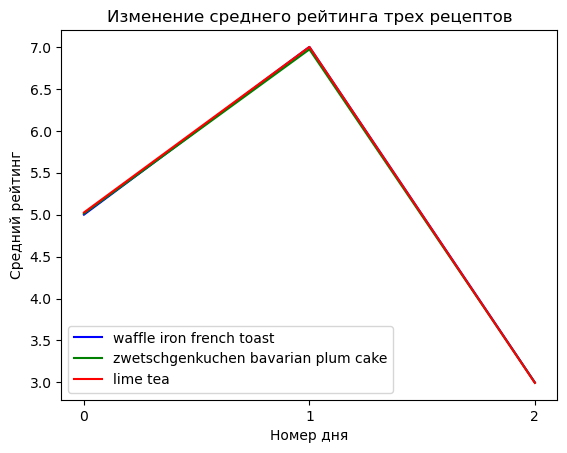

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

average_ratings = np.load('average_ratings.npy')

fig, ax = plt.subplots()

colors = ['b', 'g', 'r']
labels = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
# отрисовка графика для каждого рецепта
for i, color, label in zip(range(3), colors, labels):
    ax.plot(average_ratings[:, i], color=color, label=label)
# установка меток осей и заголовка графика
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.legend()
# установка меток для оси X
ax.set_xticks(range(average_ratings.shape[0]))

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


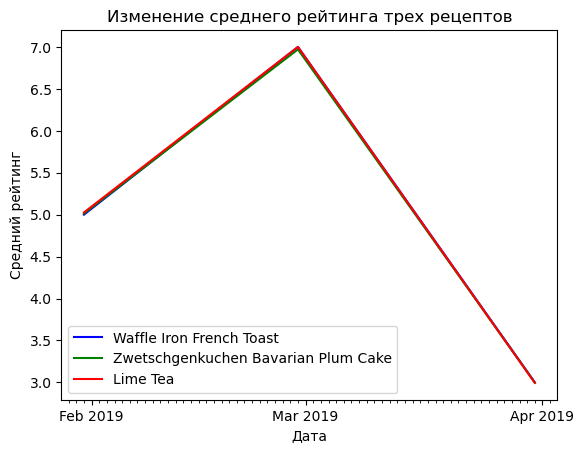

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

average_ratings = np.load('average_ratings.npy')
average_ratings = average_ratings.T
# создаем диапазон дат для оси x
date_range = pd.date_range(start='2019-01-01', end='2021-12-30', freq='M')

fig, ax = plt.subplots()
# определяем цвета и метки для графика
colors = ['b', 'g', 'r']
labels = ['Waffle Iron French Toast', 'Zwetschgenkuchen Bavarian Plum Cake', 'Lime Tea']

for i, color, label in zip(range(3), colors, labels):
    # рисуем график для каждого рецепта
    ax.plot(date_range[:len(average_ratings[i])], average_ratings[i], color=color, label=label)

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
# форматируем ось x для отображения дат
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

ax.legend()

plt.show()



3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

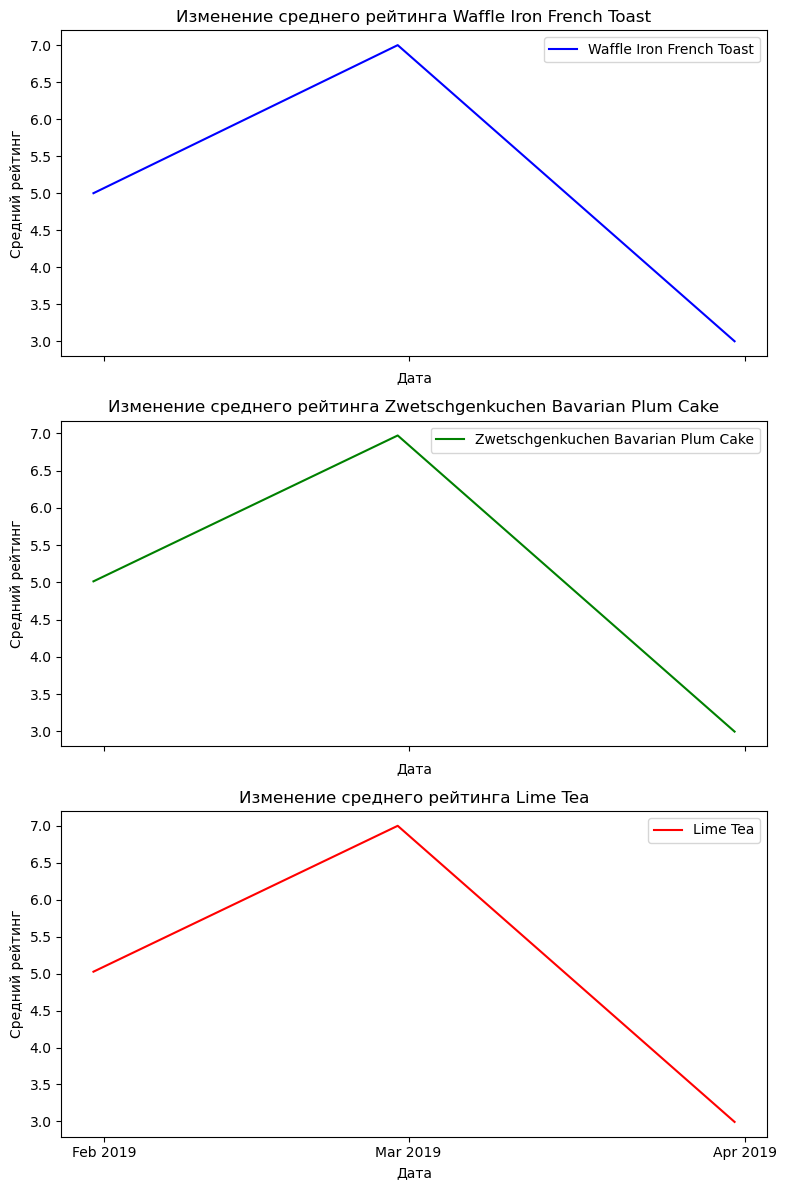

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

average_ratings = np.load('average_ratings.npy')
average_ratings = average_ratings.T
# создаем диапазон дат
date_range = pd.date_range(start='2019-01-01', end='2021-12-30', freq='M')

fig, axs = plt.subplots(nrows=3, figsize=(8, 12))
# определяем цвета и метки для каждого продукта
colors = ['b', 'g', 'r']
labels = ['Waffle Iron French Toast', 'Zwetschgenkuchen Bavarian Plum Cake', 'Lime Tea']
# для каждого рисуем график среднего рейтинга
for i, color, label in zip(range(3), colors, labels):
    axs[i].plot(date_range[:len(average_ratings[i])], average_ratings[i], color=color, label=label)
    axs[i].set_xlabel('Дата')
    axs[i].set_ylabel('Средний рейтинг')
    axs[i].set_title(f'Изменение среднего рейтинга {labels[i]}')
    axs[i].xaxis_date()
    axs[i].xaxis.set_major_locator(mdates.MonthLocator())
    # определяем формат дат на оси X
    if i < 2:
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter(''))
        axs[i].xaxis.set_minor_locator(mdates.MonthLocator())
    else:
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    axs[i].legend()

plt.tight_layout()
plt.show()



4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


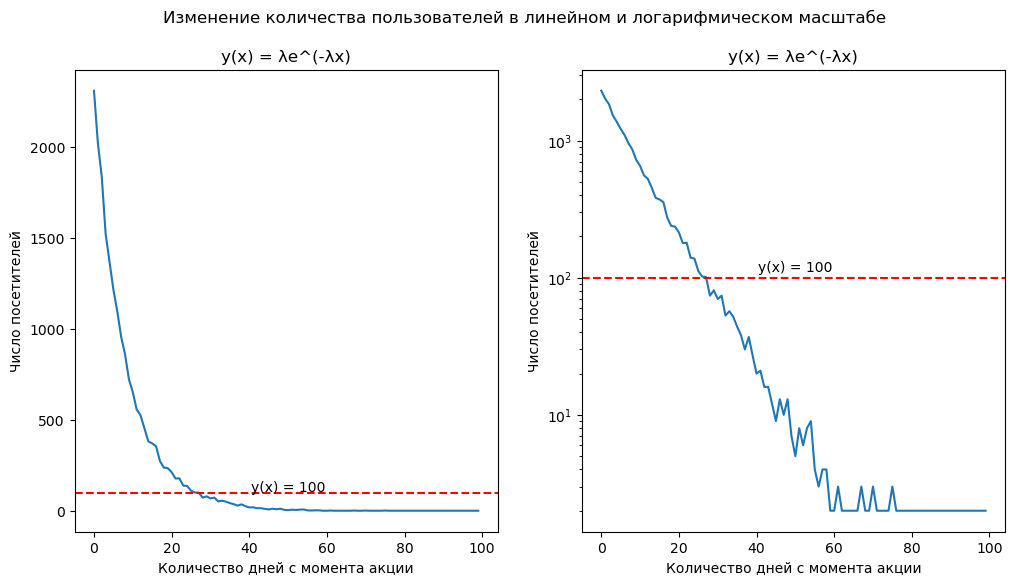

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

visitors_data = np.load('visitors.npy')
# создаем фигуру с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# линейный масштаб
ax1.plot(visitors_data)
ax1.set_title('y(x) = λe^(-λx)')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax1.axhline(y=100, color='r', linestyle='--')
ax1.text(50, 105, f'y(x) = 100', ha='center')
# логарифмический масштаб
ax2.semilogy(visitors_data)
ax2.set_title('y(x) = λe^(-λx)')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')
ax2.axhline(y=100, color='r', linestyle='--')
ax2.text(50, 110, f'y(x) = 100', ha='center')
# заголовок для всей фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

C:\Users\reser\AppData\Local\Temp\ipykernel_21204\1803923035.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = recipes.groupby('Категория').agg({'n_steps': ['mean', 'size']})


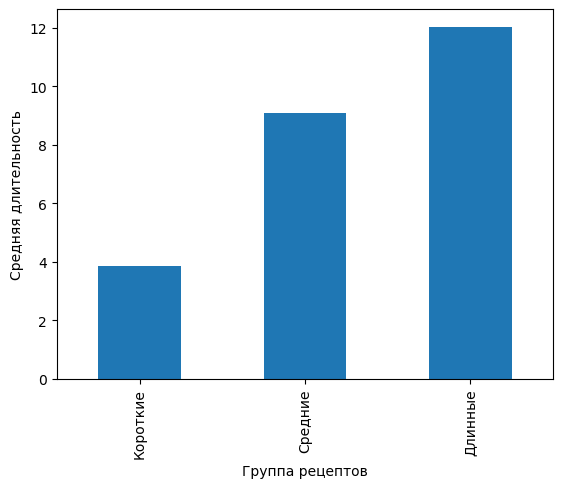

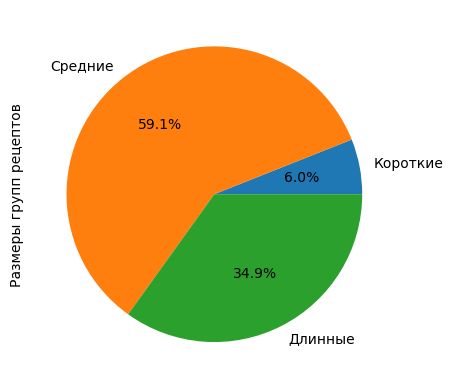

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
recipes = pd.read_csv('recipes_sample.csv')

# Добавление категории для каждого рецепта на основе времени приготовления
recipes['Категория'] = pd.cut(recipes['minutes'], bins=[0, 5, 50, float('inf')], labels=['Короткие', 'Средние', 'Длинные'])

# Группировка по категории и подсчет среднего количества шагов и размера группы
grouped = recipes.groupby('Категория').agg({'n_steps': ['mean', 'size']})

# Построение столбчатой диаграммы
fig, ax = plt.subplots()
grouped['n_steps']['mean'].plot(kind='bar', ax=ax)
ax.set_xlabel('Группа рецептов')
ax.set_ylabel('Средняя длительность')

# Построение круговой диаграммы
fig, ax2 = plt.subplots()
grouped['n_steps']['size'].plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_ylabel('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

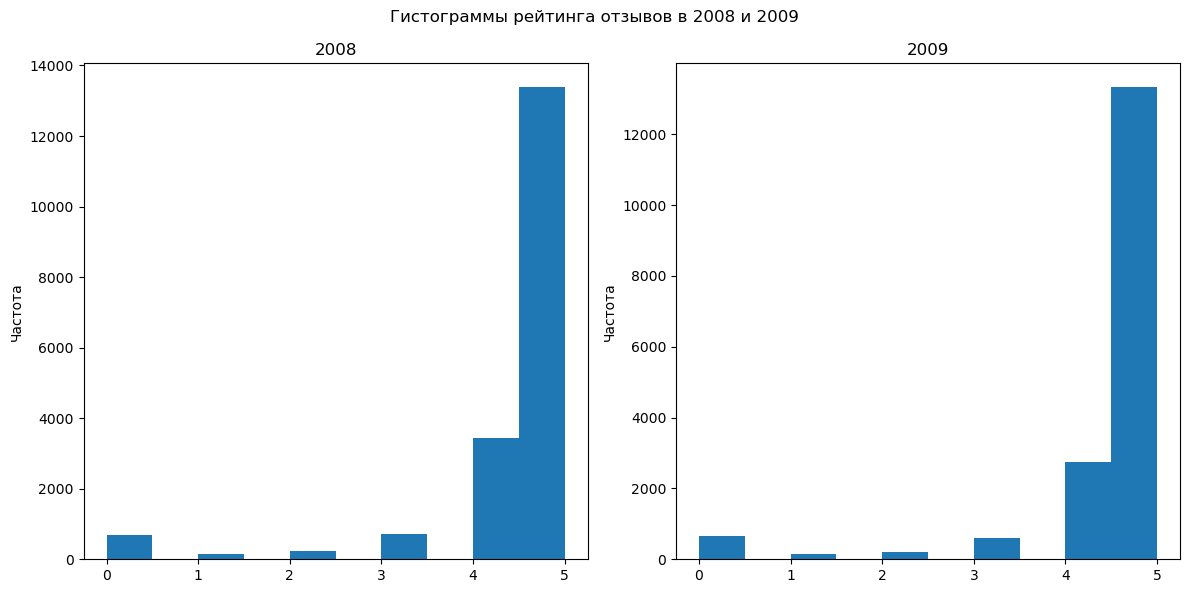

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('reviews_sample.csv')

reviews['date'] = pd.to_datetime(reviews['date'])
# фильтруем данные по годам 2008 и 2009
reviews_filtered = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]
# разделяем данные на два года
reviews_2008 = reviews_filtered[reviews_filtered['date'].dt.year == 2008]
reviews_2009 = reviews_filtered[reviews_filtered['date'].dt.year == 2009]
# создаем фигуру и оси для гистограмм
fig, axes = plt.subplots(1, 2,figsize=(12,6))
reviews_2008['rating'].plot.hist(ax=axes[0])
reviews_2009['rating'].plot.hist(ax=axes[1])
# добавляем метки и заголовки
axes[0].set_ylabel('Частота')
axes[1].set_ylabel('Частота')
axes[0].set_title('2008')
axes[1].set_title('2009')
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009')
plt.tight_layout()
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

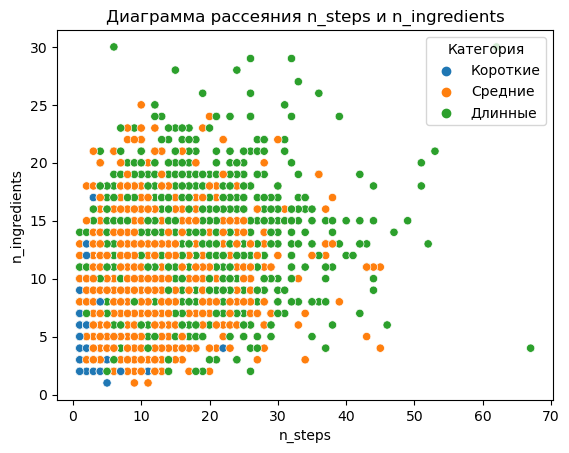

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# диаграмма рассеяния
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='Категория')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

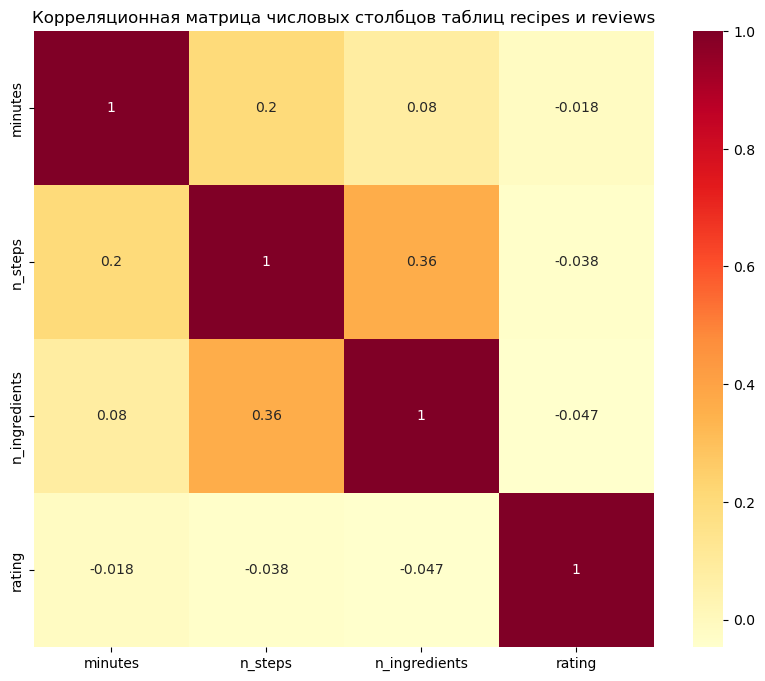

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# объединение двух таблиц
merged = pd.merge(recipes, reviews, left_on='id', right_on='user_id')

# выбор столбцов
col= ['minutes', 'n_steps', 'n_ingredients', 'rating']

# строим корреляционную матрицу
corr_matrix = merged_df[col].corr()

# визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()
